In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [4]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
from skimage.io import imread
from skimage.transform import resize 
import matplotlib.pyplot as plt
import random
import warnings
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
from sklearn import metrics
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers import LeakyReLU
from numpy import asarray

**Load the Dataset**

In [9]:
import numpy as np
from PIL import Image
import cv2
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG


one_train = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/train/1/',224))
two_train = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/train/2/',224))
three_train = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/train/3/',224))
four_train = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/train/4/',224))
five_train = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/train/5/',224))

one_test = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/test/1/',224))
two_test = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/test/2/',224))
three_test = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/test/3/',224))
four_test = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/test/4/',224))
five_test = np.array(Dataset_loader('/content/gdrive/My Drive/ATIF/dataset0/test/5/',224))


**Load the train images in train list**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
from os import listdir
from os.path import isfile, join
global onlyfiles
onlyfiles = [f for f in listdir("/content/gdrive/My Drive/ATIF/dataset0/train/") ]
X_train=[]
y_train=[]
j=0
i=0
for i in range(len(onlyfiles)):
      onlyfiles1 = [f for f in listdir("/content/gdrive/My Drive/ATIF/dataset0/train/"+onlyfiles[i]+"/") if isfile(join("/content/gdrive/My Drive/ATIF/dataset0/train/"+onlyfiles[i]+"/", f))]
      print(len(onlyfiles1))
      for j in range(len(onlyfiles1)):
        img = cv2.imread("/content/gdrive/My Drive/ATIF/dataset0/train/"+str((i+1))+"/"+onlyfiles1[j])   
        img = cv2.resize(img,(128,128))
        X_train.append(img)
        y_train.append(i+1)
        j=j+1
      i=i+1


**Display Sample Images**

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200, 1))
for i in range(200):
    plt.subplot(1, 200, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:200]))

**Load the test images in test list**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
from os import listdir
from os.path import isfile, join
global onlyfiles
onlyfiles = [f for f in listdir("/content/gdrive/My Drive/ATIF/dataset0/test/") ]
X_test=[]
y_test=[]
j=0
i=0
for i in range(len(onlyfiles)):
      onlyfiles1 = [f for f in listdir("/content/gdrive/My Drive/ATIF/dataset0/test/"+onlyfiles[i]+"/") if isfile(join("/content/gdrive/My Drive/ATIF/dataset0/test/"+onlyfiles[i]+"/", f))]
      print(len(onlyfiles1))
      for j in range(len(onlyfiles1)):
        img = cv2.imread("/content/gdrive/My Drive/ATIF/dataset0/test/"+str((i+1))+"/"+onlyfiles1[j])   
        img = cv2.resize(img,(128,128))
        X_test.append(img)
        y_test.append(i+1)
        j=j+1
      i=i+1


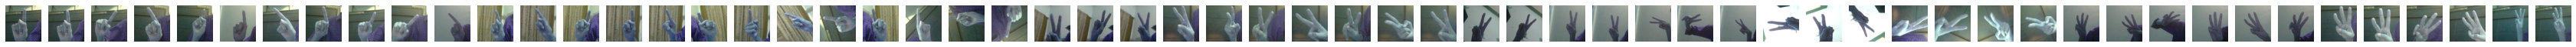

label for each of the above image: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60, 1))
for i in range(60):
    plt.subplot(1, 60, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:200]))

**Encode Lists**

In [13]:
>>> from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

y_train = np.array(y_train)
X_train = np.array(X_train)

y_test = np.array(y_test)
X_test= np.array(X_test)

In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (460, 128, 128, 3)
X_test Shape:  (120, 128, 128, 3)
y_train Shape:  (460, 5)
y_test Shape:  (120, 5)


**Construct Model with backbone DenseNet**

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
import numpy as np
import cv2
from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from keras import layers
from keras.optimizers import Adam
 
from keras.preprocessing import image
#rom keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#from keras.applications import ResNet50,DenseNet201
model = Sequential()
model.add(DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(128,128,3)
))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation='softmax'))
    

74842112/74836368 [==============================] - 2s 0us/step


**Transfer Learning**

In [15]:
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(lr=1e-4),
        metrics=['accuracy']
    )

 
# Checkpoint
    filepath="/content/sample_data/weights.best.hdf5"
    out = model.fit(
X_train,y_train,
                    epochs=6, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0
)

Epoch 1/6
15/15 [==============================] - 129s 9s/step - loss: 0.4306 - accuracy: 0.4587 - val_loss: 0.3201 - val_accuracy: 0.6167
Epoch 2/6
15/15 [==============================] - 125s 8s/step - loss: 0.1240 - accuracy: 0.9261 - val_loss: 0.1813 - val_accuracy: 0.7750
Epoch 3/6
15/15 [==============================] - 129s 9s/step - loss: 0.0422 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9333
Epoch 4/6
15/15 [==============================] - 126s 8s/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9417
Epoch 5/6
15/15 [==============================] - 128s 9s/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0887 - val_accuracy: 0.8917
Epoch 6/6
15/15 [==============================] - 126s 8s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9417


**Evaluate Model**

In [16]:
loss_and_metrics = model.evaluate(X_test,y_test)


4/4 [==============================] - 5s 1s/step - loss: 0.0627 - accuracy: 0.9417


**Prediction**

In [17]:
numbers = ['one', 'two', 'three', 'four', 'five']

In [18]:
predicted_classes = model.predict(X_train[:,:,:,:])
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
numbers[predicted_classes[50]]
#print(X_test.shape)



'one'

In [ ]:
img0=cv2.imread("/content/gdrive/My Drive/ATIF/dataset0/test/3/1.png")
img0 = cv2.resize(img0,(128,128))
img0=img0.reshape(1,128,128,3)
predicted_classes = model.predict(img0)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
numbers[predicted_classes[0]]
#print(X_test.shape)

'three'

**Save Model in JOSN format or hd5 format as u wish**

In [ ]:
# save model structure to JSON (no weights)
model_json = model.to_json()
with open("/content/sample_data/model_to_json.json", "w") as json_file:
    json_file.write(model_json)
# saving the model weight separately
model.save_weights("/content/sample_data/j_model.h5")

In [19]:
from tensorflow.keras.models import load_model
# save entire model to HDF5 
model.save("/content/sample_data/network.h5")